# 06/16/20
# This notebook visualizes lens score assigned to each candidate and sigma2.

In [1]:
# libraries
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [33]:
# read in catalogs
links = pd.read_csv('/home/shawn/Desktop/links_autoz/files/csv/links_autoz_sample_latest.csv')
links_knabel = pd.read_csv('/home/shawn/Desktop/links_autoz/files/csv/links_knabel_autoz_sample_latest.csv')
li = pd.read_csv('/home/shawn/Desktop/links_autoz/files/csv/li_autoz_sample_latest.csv')

links_raw = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/linkstable_trimmed.csv')

In [34]:
# does Li have a score assignment?
li.columns
# yes. score is visual. probability is from cnn. s*p/10 takes both into account.

Index(['Unnamed: 0', 'GAMA_ID', 'name', 'KIDS_ID', 'RA', 'DEC', 'score',
       'type', 'corrected_stellar_mass', 'zlens', 'sigma_lens', 'zsource',
       'sigma_source', 'R', 'dlens', 'dsource', 'Z', 'STELLAR_MASS', 'f_dm',
       'theta_e_Ang_slide', 'D1', 'D2', 'z1', 'sigma1', 'template1', 'z2',
       'sigma2', 'template2', 'sigma3', 'sigma4', 'prob', 'error', 'mag',
       'mag_err', 'zphot', 'z_min', 'probability', 's*p/10', 'num_0', 'z_max',
       'rms'],
      dtype='object')

In [35]:
links_raw.columns
# P1 and P3 are 1-band cnn and 3-band cnn.

Index(['ID', 'score', 'P1', 'P3', 'RA', 'DEC', 'DISC'], dtype='object')

In [39]:
#links1 = pd.merge(links, links_raw, on = 'ID', how = 'inner')
#links1 = links1.drop(columns = {'Unnamed: 0','RA_y','DEC_y','DISC','SCORE'})
links1.columns
links = links1
#links.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_autoz_sample_061620.csv')
#links.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_autoz_sample_latest.csv')

In [42]:
#links2 = pd.merge(links_knabel, links_raw, on = 'ID', how = 'inner')
#links2 = links2.drop(columns = {'Unnamed: 0','RA_y','DEC_y','DISC','SCORE'})
#links2.columns
links_knabel = links2
#links_knabel.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_knabel_autoz_sample_061620.csv')
#links_knabel.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links__knabel_autoz_sample_latest.csv')

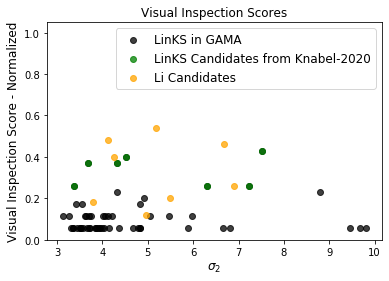

In [60]:
# plots

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(#links.R,
          links.sigma2,
    links.score/70.,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(#links_identified.R,
           links_knabel.sigma2,
    links_knabel.score/70.,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')

ax.scatter(#li.R,
           li.sigma2,
    li.score/10.,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('Visual Inspection Score - Normalized', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('Visual Inspection Scores')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig('/home/shawn/Desktop/links_autoz/visuals/png/visual_score_to_sigma2_061620.png')

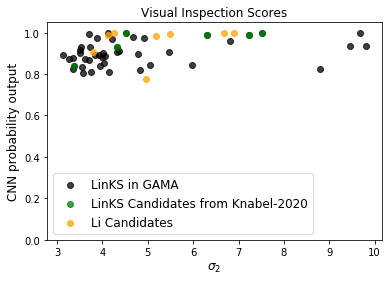

In [61]:
# plots

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0.9, 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(#links.R,
          links.sigma2,
    links.P1,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(#links_identified.R,
           links_knabel.sigma2,
    links_knabel.P1,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(#li.R,
           li.sigma2,
    li.probability,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('CNN probability output', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('Visual Inspection Scores')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig('/home/shawn/Desktop/links_autoz/visuals/png/cnn_score_to_sigma2_061620.png')

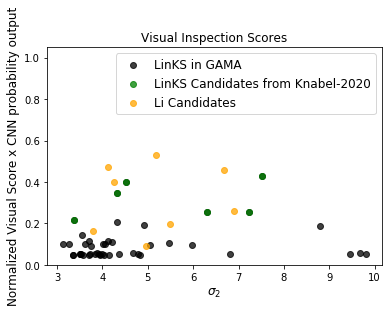

In [63]:
# plots

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0.9, 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(#links.R,
          links.sigma2,
    links.P1*links.score/70.,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(#links_identified.R,
           links_knabel.sigma2,
    links_knabel.P1*links_knabel.score/70.,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(#li.R,
           li.sigma2,
    li['s*p/10'],
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('Normalized Visual Score x CNN probability output', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('Visual Inspection Scores')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig('/home/shawn/Desktop/links_autoz/visuals/png/product_of_scores_to_sigma2_061620.png')

# There doesn't appear to be much correlation between high scores and a high value for $\sigma_2$.